<br>

# TextVQG Evaluation Notebook
-----

In [1]:
import os
import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from collections import Counter

In [3]:
path = "./random"
models = next(os.walk(path))[1]
print(models)

['model_50_FastText_4bb', 'model_50_FastText_nobb', 'model_50_FastText_4bb_128']


In [4]:
def test_different_questions(questions):
    return dict(Counter(questions))

In [5]:
# Read data and save DataFrame

df_metrics = pd.DataFrame()
df_gen_questions = pd.DataFrame()

for model in models:
    epochs = next(os.walk(f"{path}/{model}"))[1]
    for epoch in epochs:
        e = epoch.split("-")[1]
        try:
            with open(f"{path}/{model}/{epoch}/results.json") as file:
                metrics = json.load(file)
                file.close()
            metrics["ModelName"] = model
            metrics["Epoch"] = int(e)
            metrics["Bleu_1"] = pd.to_numeric(metrics["Bleu_1"])
            df_metrics = df_metrics.append(metrics, ignore_index=True)
        except:
            pass
        
        try:
            with open(f"{path}/{model}/{epoch}/preds.json") as file:
                gen_questions = json.load(file)
                file.close()
            aux = {}
            aux["Questions"] = test_different_questions(gen_questions)
            aux["ModelName"] = model
            aux["Epoch"] = int(e)
            df_gen_questions = df_gen_questions.append(aux, ignore_index=True)
        except:
            pass
        
df_metrics = df_metrics.sort_values(["ModelName", "Epoch"])
df_gen_questions = df_gen_questions.sort_values(["ModelName", "Epoch"])

KeyError: 'ModelName'

In [6]:
df_metrics

""


In [7]:
df_gen_questions

,Questions,ModelName,Epoch
0,"{'what is the name of the store ?': 1056, 'wha...",model_50_FastText_4bb,11.0
1,"{'what is the name of the store ?': 1056, 'wha...",model_50_FastText_4bb,10.0
2,"{'what is the name of the store ?': 1059, 'wha...",model_50_FastText_4bb,12.0
3,"{'what is the name of the store ?': 1055, 'wha...",model_50_FastText_4bb,9.0
4,"{'what is the name of the store ?': 1054, 'wha...",model_50_FastText_4bb,8.0
5,"{'what is the name of the store ?': 869, 'what...",model_50_FastText_nobb,11.0
6,"{'what is the name of the store ?': 872, 'what...",model_50_FastText_nobb,10.0
7,"{'what is the name of the store ?': 922, 'what...",model_50_FastText_nobb,12.0
8,"{'what is the name of the store ?': 871, 'what...",model_50_FastText_nobb,9.0
9,"{'what is the name of the store ?': 872, 'what...",model_50_FastText_nobb,8.0


In [8]:
for idx, model in df_gen_questions.iterrows():
    print("Model:", model["ModelName"], "  Epoch:", model["Epoch"])
    print("   --> Different questions:", len(model["Questions"]))
    for q in model["Questions"]:
        print("        -", q, "   Rep.", model["Questions"][q])
    print(" ")

Model: model_50_FastText_4bb   Epoch: 11.0
   --> Different questions: 19
        - what is the name of the store ?    Rep. 1056
        - what is the name of the <unk> ?    Rep. 1635
        - what is the brand of the <unk> ?    Rep. 192
        - what is the name of the plane ?    Rep. 176
        - what is the name of the street ?    Rep. 247
        - what is the name of the bus ?    Rep. 285
        - what is the name of the player ?    Rep. 151
        - what is the number on the train ?    Rep. 18
        - what is the bus number ?    Rep. 207
        - what is the number of the bus ?    Rep. 46
        - what is the number on the side of the bus ?    Rep. 10
        - what is the number on the bus ?    Rep. 20
        - what is the number on the side of the plane ?    Rep. 48
        - what is the number on the blue ?    Rep. 2
        - what is the number on the bottom of the left ?    Rep. 1
        - what is the name of the train ?    Rep. 3
        - what is the name of the

Model: model_50-0.0001-0.05-0.05-bb-0.3


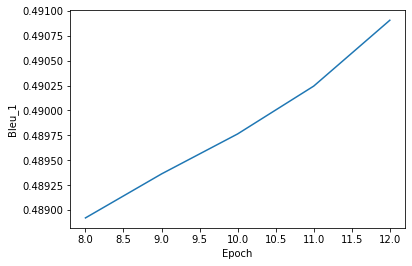

Model: model_18-0.0001-0.05-0.05-nobb-0.3


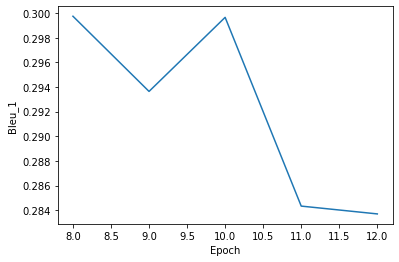

Model: model_50-0.0001-0.05-0.05-nobb-0.3


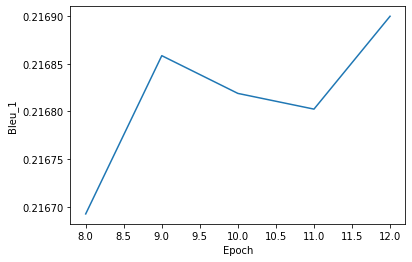

Model: model_18-0.0001-0.05-0.05-bb-0.3


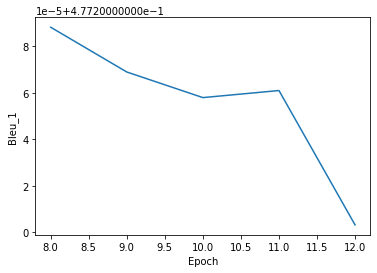

In [22]:
for model in models:
    print("Model:", model)
    df_model = df_metrics[df_metrics["ModelName"]==model]
    sns.lineplot(y="Bleu_1", x="Epoch", data=df_model)
    plt.show()